In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from IPython import display

URL = 'http://localhost:8080'

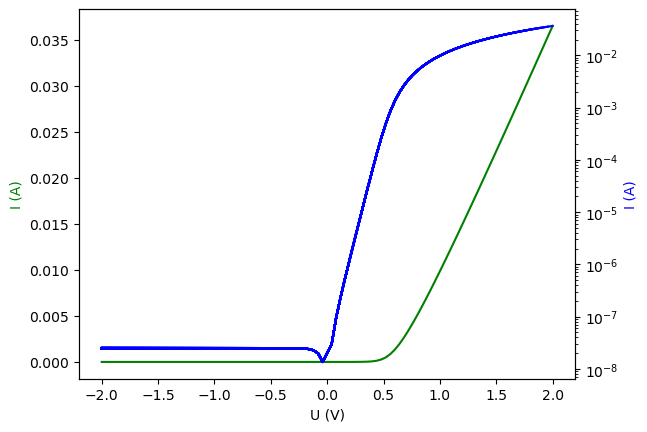

[-2.   -1.96 -1.92 -1.88 -1.84 -1.8  -1.76 -1.72 -1.68 -1.64 -1.6  -1.56
 -1.52 -1.48 -1.44 -1.4  -1.36 -1.32 -1.28 -1.24 -1.2  -1.16 -1.12 -1.08
 -1.04 -1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6
 -0.56 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12
 -0.08 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36
  0.4   0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84
  0.88  0.92  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32
  1.36  1.4   1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8
  1.84  1.88  1.92  1.96  2.  ]
[-2.49692678e-08 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08
 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08
 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08
 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08
 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08
 -2.49692678e-08 -2.49692678e-08 -2.49692678e-08 -2.49692677e

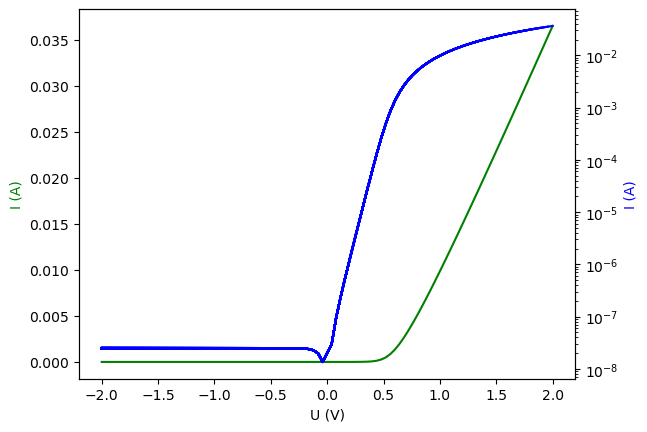

In [8]:
# Example 1: I-V measurement on p-n diode

result = requests.get(URL, params={'smu_diode.NPLC': 1})
result = requests.get(URL, params={'dmm_pt1000.NPLC': 1})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
dataU = np.array([])
dataI = np.array([])

for voltage in np.linspace(-2, 2, 101):
    result = requests.get(URL, params={'smu_diode.U': voltage})
    if result.status_code == 200:
        result = requests.get(URL, params={'smu_diode.I': ''})
        if result.status_code == 200:
            current = float(result.text)
            print(str(voltage)+'; '+str(current))
            dataU = np.append(dataU, voltage)
            dataI = np.append(dataI, current)

            ax1.cla()
            ax1.set_xlabel('U (V)')
            ax1.set_ylabel('I (A)', color='g')
            ax2.set_ylabel('I (A)', color='b')
            ax2.set_yscale('log')
            
            ax1.plot(dataU, dataI, color='g')
            mask = (dataI != 0)
            ax2.plot(dataU[mask], np.abs(dataI[mask]), color='b')

            display(fig, clear=True)

print(dataU)
print(dataI)

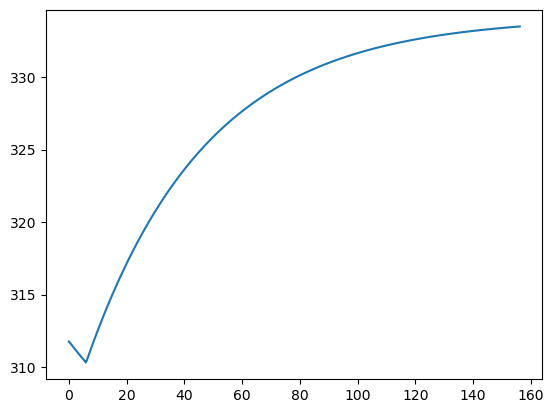

In [ ]:
# Example 2: measurement of pt1000 resistance as a function of time from peltier heater



fig, ax = plt.subplots()

starttime = datetime.now()

times = [0]
temps = [float(requests.get(URL, params={'dmm_pt1000.R': ''}).text)]

# set peltier current to 1 A
result = requests.get(URL, params={'smu_heater.I': 1})

while True:
    try:
        t = (datetime.now() - starttime).total_seconds()
        T = float(requests.get(URL, params={'dmm_pt1000.R': ''}).text)
        times.append(t)
        temps.append(T)

        ax.clear()
        ax.plot(times, temps)        
        fig.canvas.draw()
        fig.canvas.flush_events()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        # time.sleep(.5)
    except KeyboardInterrupt:
        break